In [178]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [179]:
brkb_path = Path("brkb.csv")
voo_path = Path("voo.csv")
vz_path = Path("vz.csv")
spy_path = Path("spy.csv")
ccl_path = Path("ccl.csv")

brkb_df = pd.read_csv(brkb_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
voo_df = pd.read_csv(voo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
vz_df = pd.read_csv(vz_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
spy_df = pd.read_csv(spy_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
ccl_df = pd.read_csv(ccl_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_path = Path("sp500.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [180]:
brkb_df.head()

,Close
Date,
2019-01-02 16:00:00,202.80
2019-01-03 16:00:00,191.66
2019-01-04 16:00:00,195.20
2019-01-07 16:00:00,196.91
2019-01-08 16:00:00,196.31


In [181]:
combined_df = pd.concat([brkb_df, voo_df, vz_df, spy_df, ccl_df], axis="columns", join="inner")

combined_df.head()

,Close,Close,Close,Close,Close
Date,,,,,
2019-01-02 16:00:00,202.80,229.99,56.02,250.18,49.85
2019-01-03 16:00:00,191.66,224.50,56.22,244.21,47.37
2019-01-04 16:00:00,195.20,231.91,56.36,252.39,50.05
2019-01-07 16:00:00,196.91,233.65,56.72,254.38,50.64
2019-01-08 16:00:00,196.31,235.92,58.38,256.77,51.90


In [182]:
combined_df.columns = ['BRKB', 'VOO', 'VZ', 'SPY', 'CCL']
combined_df.head()

,BRKB,VOO,VZ,SPY,CCL
Date,,,,,
2019-01-02 16:00:00,202.80,229.99,56.02,250.18,49.85
2019-01-03 16:00:00,191.66,224.50,56.22,244.21,47.37
2019-01-04 16:00:00,195.20,231.91,56.36,252.39,50.05
2019-01-07 16:00:00,196.91,233.65,56.72,254.38,50.64
2019-01-08 16:00:00,196.31,235.92,58.38,256.77,51.90


In [183]:
combined_df.tail()

,BRKB,VOO,VZ,SPY,CCL
Date,,,,,
2021-04-30 16:00:00,274.95,383.57,57.79,417.30,27.96
2021-05-03 16:00:00,279.18,384.44,57.92,418.20,27.93
2021-05-04 16:00:00,280.26,382.10,58.60,415.62,26.68
2021-05-05 16:00:00,282.76,382.17,58.69,415.75,26.52
2021-05-06 16:00:00,289.71,385.28,59.29,419.07,25.95


In [184]:
daily_returns = combined_df.pct_change()
daily_returns.head()

,BRKB,VOO,VZ,SPY,CCL
Date,,,,,
2019-01-02 16:00:00,NaN,NaN,NaN,NaN,NaN
2019-01-03 16:00:00,-0.054931,-0.023871,0.003570,-0.023863,-0.049749
2019-01-04 16:00:00,0.018470,0.033007,0.002490,0.033496,0.056576
2019-01-07 16:00:00,0.008760,0.007503,0.006388,0.007885,0.011788
2019-01-08 16:00:00,-0.003047,0.009715,0.029267,0.009395,0.024882


In [185]:
daily_returns = daily_returns.dropna()
daily_returns.head()

,BRKB,VOO,VZ,SPY,CCL
Date,,,,,
2019-01-03 16:00:00,-0.054931,-0.023871,0.003570,-0.023863,-0.049749
2019-01-04 16:00:00,0.018470,0.033007,0.002490,0.033496,0.056576
2019-01-07 16:00:00,0.008760,0.007503,0.006388,0.007885,0.011788
2019-01-08 16:00:00,-0.003047,0.009715,0.029267,0.009395,0.024882
2019-01-09 16:00:00,0.000306,0.004620,-0.022782,0.004673,0.001734


In [186]:
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2019-01-03 16:00:00   -0.029769
2019-01-04 16:00:00    0.028808
2019-01-07 16:00:00    0.008465
2019-01-08 16:00:00    0.014042
2019-01-09 16:00:00   -0.002290
dtype: float64

In [187]:
portfolio_returns.tail()

Date
2021-04-30 16:00:00    0.002608
2021-05-03 16:00:00    0.004197
2021-05-04 16:00:00   -0.008280
2021-05-05 16:00:00    0.000991
2021-05-06 16:00:00    0.005886
dtype: float64

In [188]:
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

Date
2019-01-03 16:00:00   -0.029769
2019-01-04 16:00:00   -0.001819
2019-01-07 16:00:00    0.006631
2019-01-08 16:00:00    0.020766
2019-01-09 16:00:00    0.018429
dtype: float64

In [189]:
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.tail()

Date
2021-04-30 16:00:00    0.312695
2021-05-03 16:00:00    0.318205
2021-05-04 16:00:00    0.307289
2021-05-05 16:00:00    0.308585
2021-05-06 16:00:00    0.316288
dtype: float64

<AxesSubplot:xlabel='Date'>

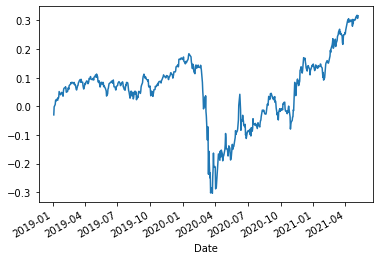

In [190]:
cumulative_returns.plot()

In [191]:
#all_portfolio_std = cumulative_returns.std()
#all_portfolio_std.head()

In [192]:
all_portfolio_std=np.array(cumulative_returns, dtype=np.float64)
all_portfolio_std.std()

0.11624729235549479

In [193]:
portfolio_annual_std = all_portfolio_std.std() * np.sqrt(252)
portfolio_annual_std

1.8453685569435547

In [194]:
combined_df.rolling(window=21).std().dropna()

,BRKB,VOO,VZ,SPY,CCL
Date,,,,,
2019-01-31 16:00:00,3.786630,5.662084,1.341613,6.155708,2.631103
2019-02-01 16:00:00,4.298648,5.600654,1.411310,6.081365,2.671338
2019-02-04 16:00:00,4.302568,4.796393,1.513665,5.188352,2.421265
2019-02-05 16:00:00,4.409486,4.779503,1.595671,5.164251,2.402194
2019-02-06 16:00:00,4.427091,4.737307,1.686803,5.122179,2.350008
...,...,...,...,...,...
2021-04-30 16:00:00,4.728918,4.598045,0.755086,4.988773,0.811539
2021-05-03 16:00:00,4.613967,3.901875,0.746663,4.240877,0.792544
2021-05-04 16:00:00,4.862741,3.585742,0.728853,3.902163,0.817081


<AxesSubplot:xlabel='Date'>

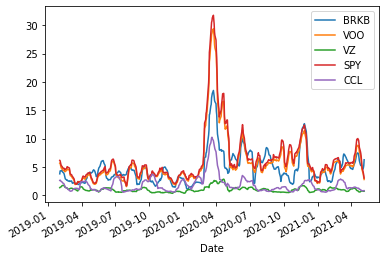

In [195]:
combined_df.rolling(window=21).std().plot()

In [196]:
price_correlation = combined_df.corr()

<AxesSubplot:>

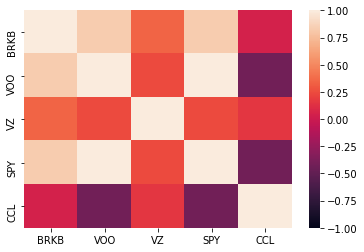

In [197]:
sns.heatmap(price_correlation, vmin=-1, vmax=1)

In [198]:
columns = ["S&P500"]
sp500_df.columns = columns
sp500_df.head()

,S&P500
Date,
2019-01-02 16:00:00,2510.03
2019-01-03 16:00:00,2447.89
2019-01-04 16:00:00,2531.94
2019-01-07 16:00:00,2549.69
2019-01-08 16:00:00,2574.41


In [199]:
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,S&P500
Date,
2019-01-02 16:00:00,NaN
2019-01-03 16:00:00,-0.024757
2019-01-04 16:00:00,0.034336
2019-01-07 16:00:00,0.007010
2019-01-08 16:00:00,0.009695


In [200]:
sp500_df.dropna()

,S&P500
Date,
2019-01-02 16:00:00,2510.03
2019-01-03 16:00:00,2447.89
2019-01-04 16:00:00,2531.94
2019-01-07 16:00:00,2549.69
2019-01-08 16:00:00,2574.41
...,...
2021-04-30 16:00:00,4181.17
2021-05-03 16:00:00,4192.66
2021-05-04 16:00:00,4164.66


In [201]:
brkb_covariance = daily_returns['BRKB'].cov(sp500_daily_returns['S&P500'])
brkb_covariance

0.000214545423017864

In [202]:
voo_covariance = daily_returns['VOO'].cov(sp500_daily_returns['S&P500'])
voo_covariance

0.00023839267104067147

In [203]:
vz_covariance = daily_returns['VZ'].cov(sp500_daily_returns['S&P500'])
vz_covariance

0.00011774523619652904

In [204]:
spy_covariance = daily_returns['SPY'].cov(sp500_daily_returns['S&P500'])
spy_covariance

0.00023377122082493144

In [205]:
ccl_covariance = daily_returns['CCL'].cov(sp500_daily_returns['S&P500'])
ccl_covariance

0.00043297340519502246

In [206]:
rolling_brkb_covariance = daily_returns['BRKB'].rolling(window=60).cov(sp500_daily_returns['S&P500'])
rolling_voo_covariance = daily_returns['VOO'].rolling(window=60).cov(sp500_daily_returns['S&P500'])
rolling_vz_covariance = daily_returns['VZ'].rolling(window=60).cov(sp500_daily_returns['S&P500'])
rolling_spy_covariance = daily_returns['SPY'].rolling(window=60).cov(sp500_daily_returns['S&P500'])
rolling_ccl_covariance = daily_returns['CCL'].rolling(window=60).cov(sp500_daily_returns['S&P500'])

In [207]:
rolling_variance = sp500_daily_returns['S&P500'].rolling(window=60).var()

In [208]:
rolling_brkb_beta = rolling_brkb_covariance / rolling_variance
rolling_voo_beta = rolling_voo_covariance / rolling_variance
rolling_vz_beta = rolling_vz_covariance / rolling_variance
rolling_spy_beta = rolling_spy_covariance / rolling_variance
rolling_ccl_beta = rolling_ccl_covariance / rolling_variance

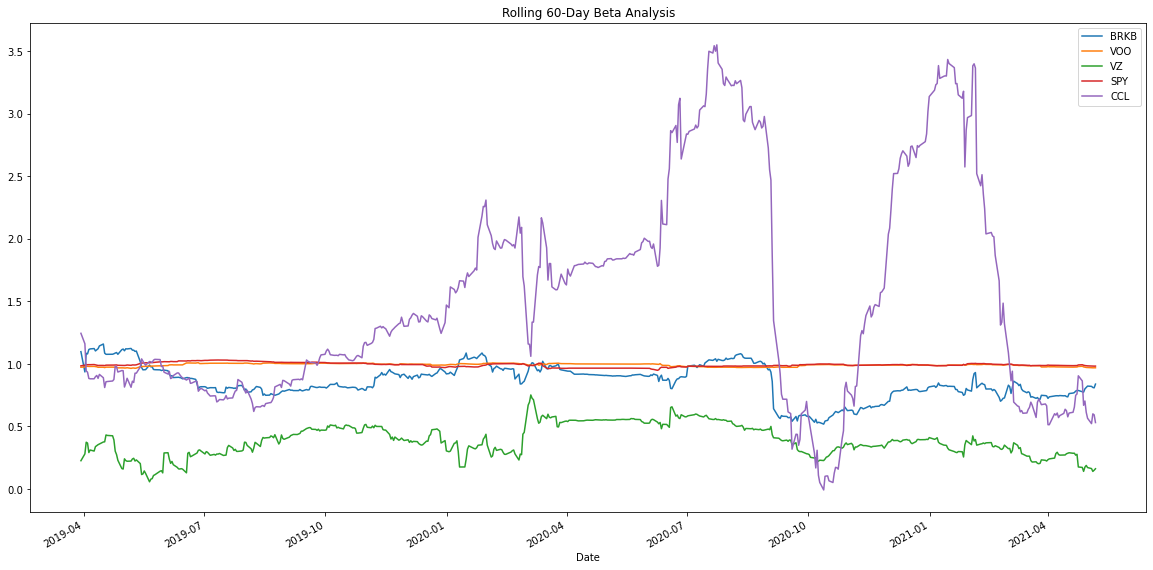

In [209]:
ax = rolling_brkb_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta Analysis')
rolling_voo_beta.plot(ax=ax)
rolling_vz_beta.plot(ax=ax)
rolling_spy_beta.plot(ax=ax)
rolling_ccl_beta.plot(ax=ax)

ax.legend(['BRKB', 'VOO', 'VZ', 'SPY', 'CCL'])

In [210]:
sp500_combined_df = pd.concat([brkb_df, voo_df, vz_df, spy_df, ccl_df, sp500_df], axis="columns", join="inner")
sp500_combined_df

,Close,Close,Close,Close,Close,S&P500
Date,,,,,,
2019-01-02 16:00:00,202.80,229.99,56.02,250.18,49.85,2510.03
2019-01-03 16:00:00,191.66,224.50,56.22,244.21,47.37,2447.89
2019-01-04 16:00:00,195.20,231.91,56.36,252.39,50.05,2531.94
2019-01-07 16:00:00,196.91,233.65,56.72,254.38,50.64,2549.69
2019-01-08 16:00:00,196.31,235.92,58.38,256.77,51.90,2574.41
...,...,...,...,...,...,...
2021-04-30 16:00:00,274.95,383.57,57.79,417.30,27.96,4181.17
2021-05-03 16:00:00,279.18,384.44,57.92,418.20,27.93,4192.66
2021-05-04 16:00:00,280.26,382.10,58.60,415.62,26.68,4164.66


In [211]:
sp500_combined_df.columns = ['BRKB', 'VOO', 'VZ', 'SPY', 'CCL', 'S&P500']
sp500_combined_df

,BRKB,VOO,VZ,SPY,CCL,S&P500
Date,,,,,,
2019-01-02 16:00:00,202.80,229.99,56.02,250.18,49.85,2510.03
2019-01-03 16:00:00,191.66,224.50,56.22,244.21,47.37,2447.89
2019-01-04 16:00:00,195.20,231.91,56.36,252.39,50.05,2531.94
2019-01-07 16:00:00,196.91,233.65,56.72,254.38,50.64,2549.69
2019-01-08 16:00:00,196.31,235.92,58.38,256.77,51.90,2574.41
...,...,...,...,...,...,...
2021-04-30 16:00:00,274.95,383.57,57.79,417.30,27.96,4181.17
2021-05-03 16:00:00,279.18,384.44,57.92,418.20,27.93,4192.66
2021-05-04 16:00:00,280.26,382.10,58.60,415.62,26.68,4164.66


In [214]:
brkb_sharpe_ratios = (portfolio_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
brkb_sharpe_ratios

array([-0.34231965, -5.60370228,  1.53683118,  0.49071947,  0.55295392,
        0.43632331,  0.40825885,  0.47838931,  0.33622743,  0.35826649,
        0.29812757,  0.19684036,  0.25154249,  0.23393754,  0.2308945 ,
        0.20846741,  0.24136732,  0.2867848 ,  0.19154323,  0.16688468,
        0.16015998,  0.15509976,  0.14851981,  0.1594442 ,  0.20553834,
        0.20571697,  0.19197906,  0.16371221,  0.15616864,  0.17095558,
        0.14179743,  0.13057178,  0.12314947,  0.12785931,  0.12169546,
        0.12229265,  0.12603194,  0.12856771,  0.13004846,  0.12189716,
        0.13952925,  0.13844453,  0.15692114,  0.17143512,  0.17799944,
        0.14016274,  0.13865614,  0.12409747,  0.12192169,  0.11569372,
        0.10861057,  0.11411126,  0.12092961,  0.10802114,  0.12114319,
        0.12044537,  0.14125399,  0.1566618 ,  0.16818401,  0.15601318,
        0.12629237,  0.13000419,  0.12199001,  0.11966013,  0.11474385,
        0.11722573,  0.12882701,  0.12355689,  0.11947386,  0.10

In [216]:
brkb_sharpe_ratios.plot.bar(title='Sharpe Ratios')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'